# Analysis 3

## Finding out monthly collisions in Manhattan to total in NYC for the year 2016

In [2]:
import pandas as pd  # importing the reqiured libraries
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from pandas import Series, DataFrame
rawdata = pd.read_csv('ProcessedData\\NYPD_Motor_Vehicle_Collisions.csv') #getting the raw data
rawdata[:2]

C:\Users\mites\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/04/2017,0:00,BROOKLYN,11206,40.700830,-73.933140,"(40.70083, -73.93314)",EVERGREEN AVENUE,NOLL STREET,NaN,...,NaN,NaN,NaN,NaN,3646753,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/04/2017,0:00,BROOKLYN,11221,40.698307,-73.923256,"(40.698307, -73.923256)",NaN,NaN,1353 MYRTLE AVENUE,...,Unspecified,NaN,NaN,NaN,3646754,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN


In [4]:
new_df = rawdata.loc[:,['DATE','BOROUGH']]  # using a temporary dataframe new_df

In [5]:
# Getting year & month from date column by using striptime method
new_df['YEAR'] = rawdata['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').date().strftime('%Y'))  #  %Y to print the year
new_df['MONTH'] = rawdata['DATE'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y').date().strftime('%B')) #  %B to prin the abbrivation of the months obtained
new_df = new_df[new_df.YEAR == '2016']  # getting data for year 2016

In [6]:
new_df[-5:] #printing last 5 values

,DATE,BOROUGH,YEAR,MONTH
281761,01/01/2016,BROOKLYN,2016,January
281762,01/01/2016,BRONX,2016,January
281763,01/01/2016,BROOKLYN,2016,January
281764,01/01/2016,NaN,2016,January
281765,01/01/2016,BROOKLYN,2016,January


### Getting the data for the whole NYC

In [7]:
nyc_df = new_df.loc[:,['MONTH','YEAR']]   #getting the month and year striped above
nyc_df = nyc_df.groupby('MONTH', sort=False).count().reset_index()      # grouping by months and calculating the count of year to get the collision number
nyc_df = nyc_df.rename(columns={'YEAR':'NYC'})    # renaming year column

In [8]:
nyc_df.head()

,MONTH,NYC
0,December,19218
1,November,19317
2,October,19667
3,August,19678
4,September,19491


### Getting the data for Manhattan

In [9]:
new_df_m = new_df[new_df['BOROUGH'] == 'MANHATTAN'] #doing the same thing for Manhattan
manhattan_df = new_df_m.loc[:,['MONTH','YEAR']]
manhattan_df = manhattan_df.groupby('MONTH',sort=False).count().reset_index()
manhattan_df = manhattan_df.rename(columns={'YEAR':'MANHATTAN'})

In [10]:
manhattan_df.head()

,MONTH,MANHATTAN
0,December,2637
1,November,2839
2,October,2832
3,September,2744
4,August,2844


In [31]:
monthly_df = manhattan_df.merge(nyc_df) # merging the NYC and Manhattan data together
monthly_df.head()

,MONTH,MANHATTAN,NYC
0,December,2637,19218
1,November,2839,19317
2,October,2832,19667
3,September,2744,19491
4,August,2844,19678


In [33]:
monthly_df['PERCENTAGE'] = monthly_df['MANHATTAN']/monthly_df['NYC']      # Calculate percentage.
monthly_df.head().to_csv('monthly.csv')

,MONTH,MANHATTAN,NYC,PERCENTAGE
0,December,2637,19218,0.137215
1,November,2839,19317,0.146969
2,October,2832,19667,0.143998
3,September,2744,19491,0.140783
4,August,2844,19678,0.144527


### Plotting the graph for the collisons in Manhattan to NYC for each month

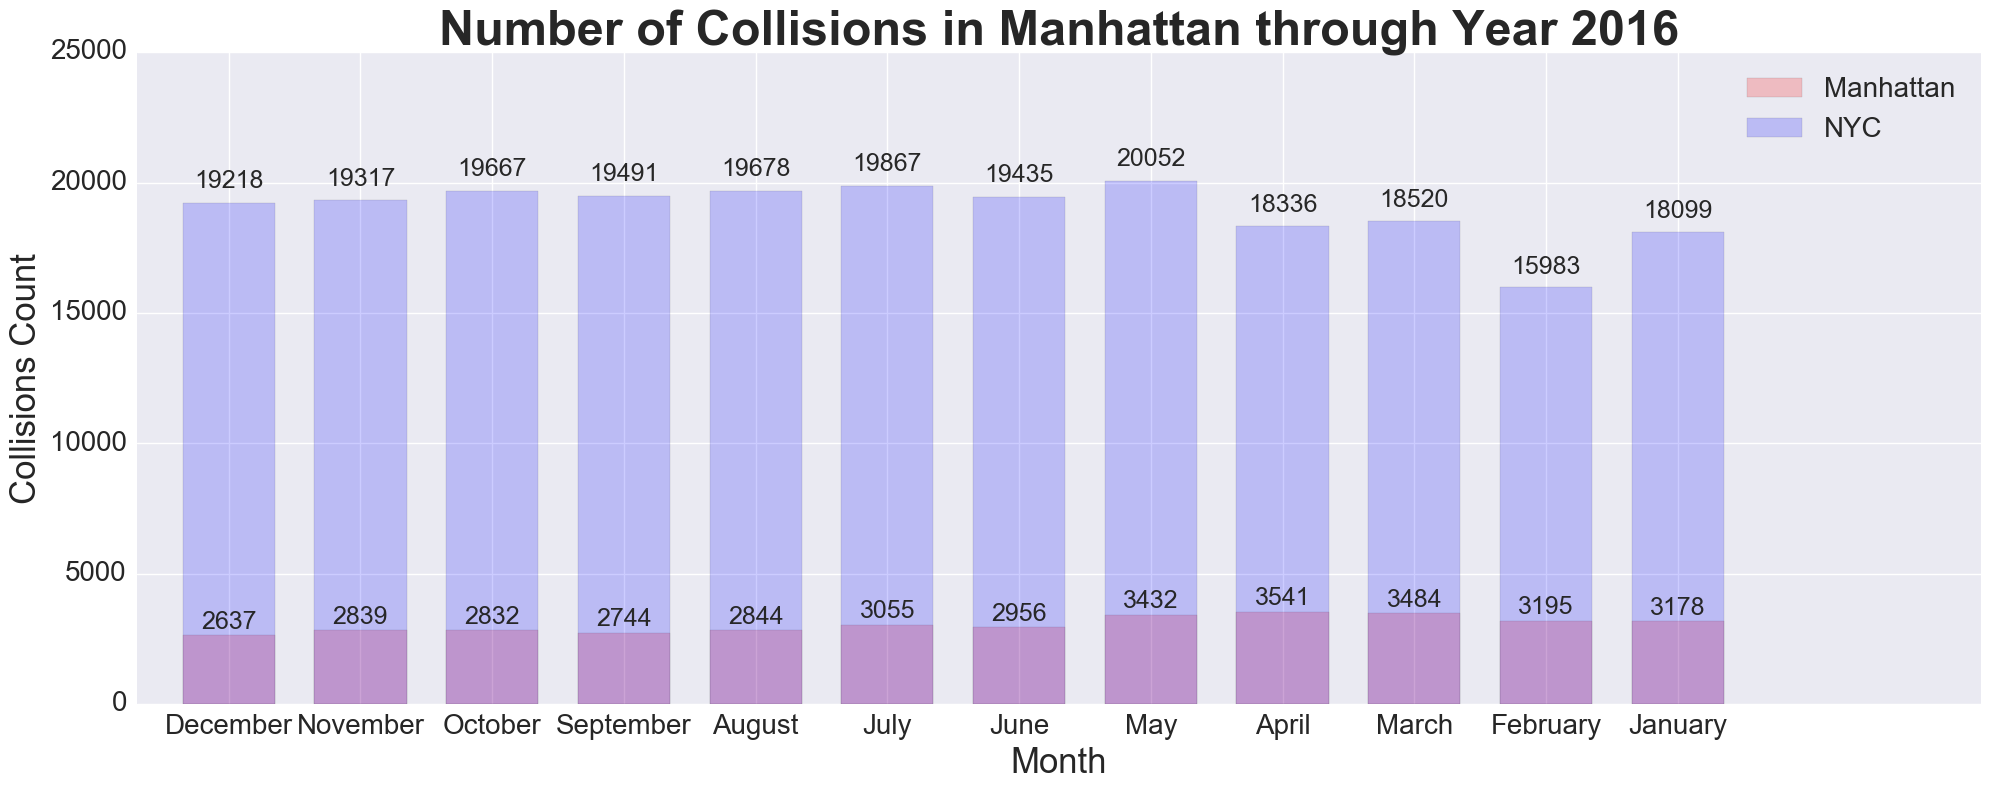

In [13]:
manhattan = list(monthly_df['MANHATTAN'])
nyc = list(monthly_df['NYC'])
month = list(monthly_df['MONTH'])

plt.subplots(figsize=(20,8))   
sns.set_style("darkgrid")

index = np.arange(12) #setting the graph parameters
bar_width = 0.7
opacity = 0.2
rects1 = plt.bar(index + bar_width/2, manhattan, bar_width, alpha=opacity, color='r', label='Manhattan')
rects2 = plt.bar(index + bar_width/2, nyc, bar_width, alpha=opacity, color='b', label='NYC')

def addlabel(rects):      # Add top labels
    for rect in rects:
        height = rect.get_height()
        label_position = height * 1.02
        plt.text(rect.get_x() + rect.get_width()/2., label_position, '%d' % int(height), ha='center', va='bottom', fontsize=18)
addlabel(rects1)
addlabel(rects2)
plt.title('Number of Collisions in Manhattan through Year 2016', fontweight='bold', fontsize=35)     
plt.xlabel('Month', fontsize=25)
plt.ylabel('Collisions Count', fontsize=25)
plt.xticks(index + bar_width, month, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 12))
fig.savefig("monthly.png")

### Plotting percentage of collisions occured each month

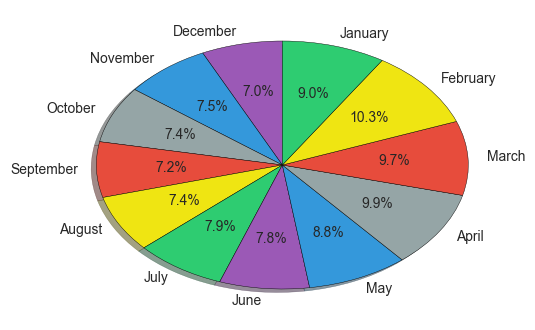

In [42]:
colors=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#EFE512", "#2ecc71"]

plt.pie(
    monthly_df['PERCENTAGE'],  #getting the percentage
    labels=monthly_df['MONTH'],  #getting the month
    shadow=True,
    startangle=90,
    colors=colors,
    # with the percent listed 
    autopct='%1.1f%%',
    )
plt.show()

In [30]:
fig = plt.figure(figsize=(4, 5))
fig.savefig("percentage.png") #saving the plot as PNG image